                                     IPL_MATCH_DATA

The dataset provides detailed information about 1,024 cricket matches, capturing various aspects such as match details, outcomes, and player performances. It includes 16 columns, with fields like match ID, city, date, season, and venue providing contextual information. Teams participating in each match are listed along with details of the toss winner and their decision (to bat or bowl). The dataset also records match outcomes, including the target score, whether a super over occurred, and the winning team. Additionally, it identifies the player of the match and the umpire officiating. Some data, such as the city, target score, and match winner, have missing values. Overall, the dataset offers a comprehensive view of cricket matches, making it suitable for analysis of team performances, match outcomes, and player contributions

IMPORT ALL LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT THE DATAFRAME

In [2]:
import pandas as pd 
df=pd.read_csv(r"D:\DATA ANALYTICS\New folder\ipl_data.csv") 

ANALYZING FIRST TEN DATA

In [3]:
print(df.head(10))

       ID        City    Date   Season  \
0  335982   Bangalore  18-Apr  2007/08   
1  335983  Chandigarh  19-Apr  2007/08   
2  335984       Delhi  19-Apr  2007/08   
3  335985      Mumbai  20-Apr  2007/08   
4  335986     Kolkata  20-Apr  2007/08   
5  335987      Jaipur  21-Apr  2007/08   
6  335988   Hyderabad  22-Apr  2007/08   
7  335989     Chennai  23-Apr  2007/08   
8  335990   Hyderabad  24-Apr  2007/08   
9  335991  Chandigarh  25-Apr  2007/08   

                                        Venue                        Team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   
5                      Sawai Mansingh Stadium             Rajasthan R

ANALYZING LAST TEN DATA

In [4]:
print(df.tail(10))

           ID        City    Date Season  \
1014  1359539   Hyderabad  18-May   2023   
1015  1359540  Dharamsala  19-May   2023   
1016  1359541       Delhi  20-May   2023   
1017  1359542     Kolkata  20-May   2023   
1018  1359543      Mumbai  21-May   2023   
1019  1359544   Bengaluru  21-May   2023   
1020  1370350     Chennai  23-May   2023   
1021  1370351     Chennai  24-May   2023   
1022  1370352   Ahmedabad  26-May   2023   
1023  1370353   Ahmedabad  29-May   2023   

                                                  Venue  \
1014  Rajiv Gandhi International Stadium, Uppal, Hyd...   
1015  Himachal Pradesh Cricket Association Stadium, ...   
1016                        Arun Jaitley Stadium, Delhi   
1017                              Eden Gardens, Kolkata   
1018                           Wankhede Stadium, Mumbai   
1019                   M Chinnaswamy Stadium, Bengaluru   
1020           MA Chidambaram Stadium, Chepauk, Chennai   
1021           MA Chidambaram Stadium, Chep

ALL INFORMATION ABOUT THE DATA

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1024 non-null   int64  
 1   City             973 non-null    object 
 2   Date             1024 non-null   object 
 3   Season           1024 non-null   object 
 4   Venue            1024 non-null   object 
 5   Team1            1024 non-null   object 
 6   Team2            1024 non-null   object 
 7   Toss_winner      1024 non-null   object 
 8   Toss_decision    1024 non-null   int64  
 9   Target           1021 non-null   float64
 10  Target_overs     1021 non-null   float64
 11  Super_over       1024 non-null   int64  
 12  Match _Winner    1019 non-null   object 
 13  Player_of_match  1019 non-null   object 
 14  Umpire           1024 non-null   object 
 15  Match_type       1024 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 128.1+ KB


CHECKING THE EMPTY CELLS OR NULLCELLS COLUMNWISE

In [6]:
print(df.isna().sum())

ID                  0
City               51
Date                0
Season              0
Venue               0
Team1               0
Team2               0
Toss_winner         0
Toss_decision       0
Target              3
Target_overs        3
Super_over          0
Match _Winner       5
Player_of_match     5
Umpire              0
Match_type          0
dtype: int64


CHECK THE TOTAL NULL CELLS

In [7]:
print(df.isna().sum().sum())

67


REMOVE THE ROWS THAT CONTAIN EMPTY CELLS AND RETURN A NEW DATA FRAME 

In [8]:
print(df.dropna())

           ID        City    Date   Season  \
0      335982   Bangalore  18-Apr  2007/08   
1      335983  Chandigarh  19-Apr  2007/08   
2      335984       Delhi  19-Apr  2007/08   
3      335985      Mumbai  20-Apr  2007/08   
4      335986     Kolkata  20-Apr  2007/08   
...       ...         ...     ...      ...   
1019  1359544   Bengaluru  21-May     2023   
1020  1370350     Chennai  23-May     2023   
1021  1370351     Chennai  24-May     2023   
1022  1370352   Ahmedabad  26-May     2023   
1023  1370353   Ahmedabad  29-May     2023   

                                           Venue                        Team1  \
0                          M Chinnaswamy Stadium  Royal Challengers Bangalore   
1     Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                               Feroz Shah Kotla             Delhi Daredevils   
3                               Wankhede Stadium               Mumbai Indians   
4                                   Eden G

CHECK WHETHER THE DATE FORMAT

In [9]:
df['Year'] = df['Season'].str.split('/').str[0]

# Combine Year and Date to create a full date string
df['Full_Date'] = df['Date'] + '-' + df['Year']

# Convert to datetime
df['Datetime'] = pd.to_datetime(df['Full_Date'], format='%d-%b-%Y')

# Display the DataFrame
print(df.to_string())  # Make sure you are calling the print function correctly

           ID            City    Date   Season                                                                  Venue                        Team1                        Team2                  Toss_winner  Toss_decision  Target  Target_overs  Super_over                Match _Winner    Player_of_match                 Umpire          Match_type  Year    Full_Date   Datetime
0      335982       Bangalore  18-Apr  2007/08                                                  M Chinnaswamy Stadium  Royal Challengers Bangalore        Kolkata Knight Riders  Royal Challengers Bangalore              1   223.0          20.0           0        Kolkata Knight Riders        BB McCullum              Asad Rauf              League  2007  18-Apr-2007 2007-04-18
1      335983      Chandigarh  19-Apr  2007/08                             Punjab Cricket Association Stadium, Mohali              Kings XI Punjab          Chennai Super Kings          Chennai Super Kings              0   241.0          20.0         

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               1024 non-null   int64         
 1   City             973 non-null    object        
 2   Date             1024 non-null   object        
 3   Season           1024 non-null   object        
 4   Venue            1024 non-null   object        
 5   Team1            1024 non-null   object        
 6   Team2            1024 non-null   object        
 7   Toss_winner      1024 non-null   object        
 8   Toss_decision    1024 non-null   int64         
 9   Target           1021 non-null   float64       
 10  Target_overs     1021 non-null   float64       
 11  Super_over       1024 non-null   int64         
 12  Match _Winner    1019 non-null   object        
 13  Player_of_match  1019 non-null   object        
 14  Umpire           1024 non-null   object 

CHECK DUPLICATE VALUE

In [11]:
print(df.duplicated)

<bound method DataFrame.duplicated of            ID        City    Date   Season  \
0      335982   Bangalore  18-Apr  2007/08   
1      335983  Chandigarh  19-Apr  2007/08   
2      335984       Delhi  19-Apr  2007/08   
3      335985      Mumbai  20-Apr  2007/08   
4      335986     Kolkata  20-Apr  2007/08   
...       ...         ...     ...      ...   
1019  1359544   Bengaluru  21-May     2023   
1020  1370350     Chennai  23-May     2023   
1021  1370351     Chennai  24-May     2023   
1022  1370352   Ahmedabad  26-May     2023   
1023  1370353   Ahmedabad  29-May     2023   

                                           Venue                        Team1  \
0                          M Chinnaswamy Stadium  Royal Challengers Bangalore   
1     Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                               Feroz Shah Kotla             Delhi Daredevils   
3                               Wankhede Stadium               Mumbai Indians   
4   

REMOVE DUPLICATE VALUES

In [12]:
df.drop_duplicates(inplace=True)

CHECK OUTLAYERS

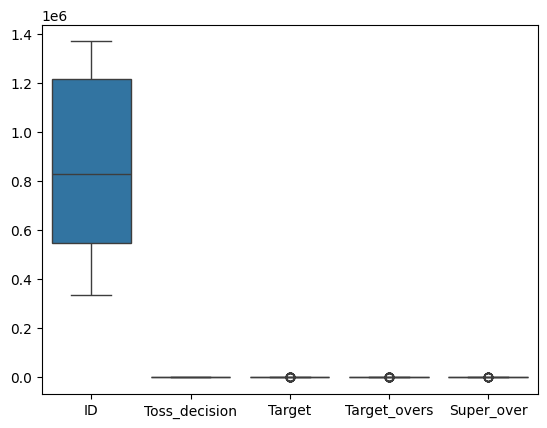

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df)
plt.show()

CHECK CORRILATION OF COLUMN

In [14]:
cor=df.corr(numeric_only=True)
print(cor)

                     ID  Toss_decision    Target  Target_overs  Super_over
ID             1.000000       0.247858  0.190602      0.037765    0.022897
Toss_decision  0.247858       1.000000  0.096159     -0.032554   -0.015983
Target         0.190602       0.096159  1.000000      0.368831   -0.003731
Target_overs   0.037765      -0.032554  0.368831      1.000000    0.018348
Super_over     0.022897      -0.015983 -0.003731      0.018348    1.000000


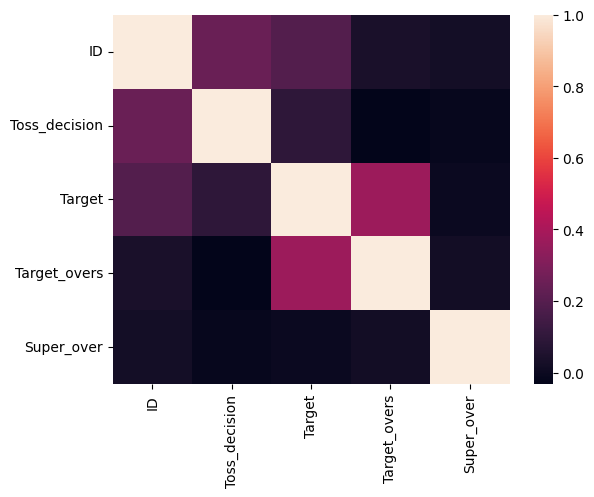

In [15]:
sns.heatmap(cor)
plt.show()

CHECK COVARIENCE OF COLUMN

In [16]:
print(df.cov(numeric_only=True))

                         ID  Toss_decision        Target  Target_overs  \
ID             1.245328e+11   42087.349554  2.176392e+06  21718.495942   
Toss_decision  4.208735e+04       0.231534  1.497250e+00     -0.025529   
Target         2.176392e+06       1.497250  1.047010e+03     19.449588   
Target_overs   2.171850e+04      -0.025529  1.944959e+01      2.655922   
Super_over     9.387486e+02      -0.000894 -1.404717e-02      0.003479   

               Super_over  
ID             938.748641  
Toss_decision   -0.000894  
Target          -0.014047  
Target_overs     0.003479  
Super_over       0.013498  


TO CHECK STATISTIC FUNCTION

In [17]:
print(df.describe())

                 ID  Toss_decision       Target  Target_overs   Super_over  \
count  1.024000e+03    1024.000000  1021.000000   1021.000000  1024.000000   
mean   8.687579e+05       0.636719   163.952008     19.746523     0.013672   
min    3.359820e+05       0.000000    43.000000      5.000000     0.000000   
25%    5.483138e+05       0.000000   145.000000     20.000000     0.000000   
50%    8.298140e+05       1.000000   165.000000     20.000000     0.000000   
75%    1.216503e+06       1.000000   185.000000     20.000000     0.000000   
max    1.370353e+06       1.000000   264.000000     20.000000     1.000000   
std    3.528920e+05       0.481180    32.357541      1.629700     0.116181   

                            Datetime  
count                           1024  
mean   2015-10-29 08:05:09.375000064  
min              2007-04-18 00:00:00  
25%              2012-04-08 18:00:00  
50%              2015-05-17 00:00:00  
75%              2020-09-30 06:00:00  
max              2023-05

QUESTION AND ANSWERS

1. WHICH CITY HOSTED THE MAXIMUM NUMBER OF MATCHES?

In [18]:
city_count=df["City"].value_counts()
max_matches=city_count.idxmax()

print(city_count)


City
Mumbai            166
Kolkata            86
Delhi              85
Chennai            76
Hyderabad          71
Bangalore          65
Chandigarh         61
Jaipur             52
Pune               51
Abu Dhabi          37
Ahmedabad          28
Bengaluru          22
Durban             15
Dubai              13
Visakhapatnam      13
Centurion          12
Dharamsala         11
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Lucknow             7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Guwahati            2
Name: count, dtype: int64


2. WHICH PLAYER WON THE PLAYER OF THE MATCH AWARD THE MOST IN EACH SEASON?

In [48]:
player_season_awards=df.groupby("Season")["Player_of_match"].agg(lambda x:x.value_counts().idxmax())
print(player_season_awards)


Season
2007/08           SE Marsh
2009             YK Pathan
2009/10       SR Tendulkar
2011              CH Gayle
2012              CH Gayle
2013            MEK Hussey
2014            GJ Maxwell
2015             DA Warner
2016               V Kohli
2017       NM Coulter-Nile
2018           Rashid Khan
2019            AD Russell
2020/21         RD Gaikwad
2021            RD Gaikwad
2022         Kuldeep Yadav
2023          Shubman Gill
Name: Player_of_match, dtype: object


3. FIND THE TOP 3 TEAM OF ALL TIME?

Match _Winner
Mumbai Indians           140
Chennai Super Kings      131
Kolkata Knight Riders    120
Name: count, dtype: int64


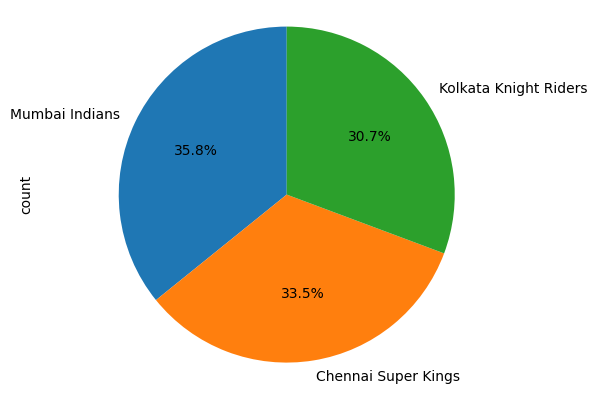

In [20]:
match_winners_count=df["Match _Winner"].value_counts()
top_team=match_winners_count.head(3)
print(top_team)
top_team.plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

4. WHICH TEAM PERFORMED BEST WHILE DEFENDING?

In [31]:
defended_matches=df[df["Target"]>0]
best_defending_team=defended_matches["Match _Winner"].value_counts().idxmax()
most_defending_wins=defended_matches["Match _Winner"].value_counts().max()
print(best_defending_team)
print(most_defending_wins)

Mumbai Indians
140


5. FIND THE TOP 5 MOST FREQUENTLY NAMED 'PLAYER OF THE MATCH'?

Player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
MS Dhoni          17
Name: count, dtype: int64


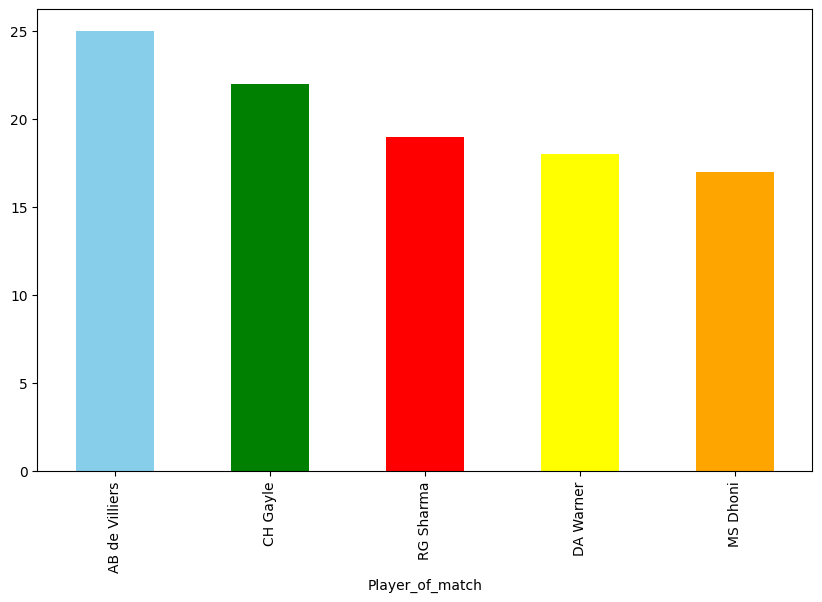

In [22]:
top_players=df["Player_of_match"].value_counts()
top_5=top_players.head(5)
print(top_5)
top_5.plot(kind='bar',figsize=(10,6),color=['skyblue','green','red','yellow','orange'])
title=('player_of_the_match')
ylabel=('number_of_times')
xlabel=('players')
plt.show()

6. WHICH TEAM HAS THE HIGHEST TARGET AND HOW MUCH?

In [23]:
highest_target=df.loc[df["Target"].idxmax()]
print(highest_target)

ID                                      598027
City                                 Bangalore
Date                                    23-Apr
Season                                    2013
Venue                    M Chinnaswamy Stadium
Team1              Royal Challengers Bangalore
Team2                            Pune Warriors
Toss_winner                      Pune Warriors
Toss_decision                                1
Target                                   264.0
Target_overs                              20.0
Super_over                                   0
Match _Winner      Royal Challengers Bangalore
Player_of_match                       CH Gayle
Umpire                               Aleem Dar
Match_type                              League
Year                                      2013
Full_Date                          23-Apr-2013
Datetime                   2013-04-23 00:00:00
Name: 352, dtype: object


7. WHICH TEAM HAS THE HIGHEST SUCCESS RATE IN CHASING?

In [24]:

chasing_success = df[df['Match _Winner'] == df['Team2']]


successful_chases = chasing_success['Match _Winner'].value_counts()

chases_attempted = df['Team2'].value_counts()


chasing_success_rate = (successful_chases / chases_attempted) * 100


best_chasing_team = chasing_success_rate.idxmax()
highest_chasing_rate = chasing_success_rate.max()

print(best_chasing_team)
print(highest_chasing_rate)

Gujarat Titans
77.77777777777779


8. WHAT IS THE AVERAGE FIRST-INNINGS SCORE FOR EACH TEAM?

In [25]:
average_first_innings=df.groupby("Team1")["Target"].mean()
print(average_first_innings)

Team1
Chennai Super Kings            169.558333
Deccan Chargers                160.666667
Delhi Capitals                 166.529412
Delhi Daredevils               159.809524
Gujarat Lions                  166.875000
Gujarat Titans                 179.466667
Kings XI Punjab                166.032609
Kochi Tuskers Kerala           145.571429
Kolkata Knight Riders          158.089286
Lucknow Super Giants           182.714286
Mumbai Indians                 166.957627
Pune Warriors                  146.652174
Punjab Kings                   168.851852
Rajasthan Royals               164.187500
Rising Pune Supergiant         163.571429
Rising Pune Supergiants        153.142857
Royal Challengers Bangalore    165.567164
Sunrisers Hyderabad            157.605263
Name: Target, dtype: float64


9.FIND THE CHANCE OF WINNING THE MATCH THAT WON THE TOSS?

In [26]:
match_won_by_toss_winner=(df["Toss_winner"]==df["Match _Winner"]).sum()
total_matches=len(df)
chance_of_winning_after_toss=(match_won_by_toss_winner/total_matches)*100
print(chance_of_winning_after_toss)


51.07421875


10. HOW MANY MATCHES WERE PLAYED IN EACH SEASON?

Season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
Name: count, dtype: int64


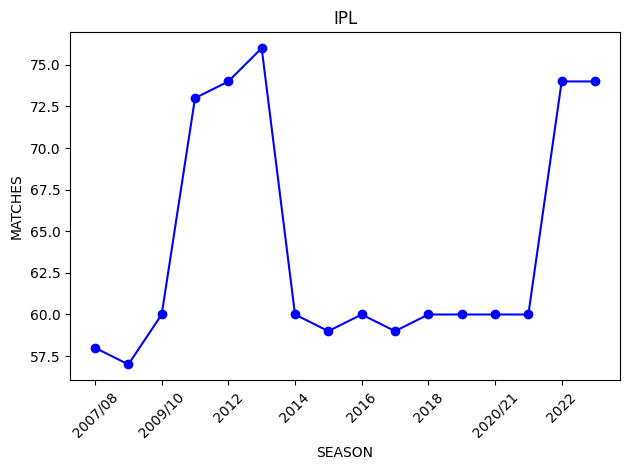

In [27]:
season_match_count=df["Season"].value_counts().sort_index()
print(season_match_count)
season_match_count.plot(kind='line', marker='o', linestyle='-', color='b', title='IPL')
plt.xlabel('SEASON')
plt.ylabel('MATCHES')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

11 WHICH UMPIRE HAS HOST MORE MATCHES?

AK Chaudhary


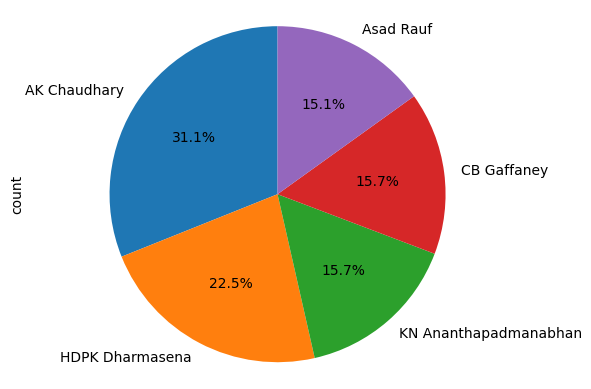

In [28]:
umpire_matches=df["Umpire"].value_counts().head(5)
most_matches_umpire=umpire_matches.idxmax()
print(most_matches_umpire)
umpire_matches.plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

12. HOW MANY UNIQUE PLAYERS HAVE WON PLAYER OF MATCH?

In [40]:
unique_players=df["Player_of_match"].nunique()
print(unique_players)

280


13 WHICH TEAM WON THE MOST TOSSES?

Toss_winner
Mumbai Indians                 133
Kolkata Knight Riders          119
Chennai Super Kings            119
Royal Challengers Bangalore    113
Rajasthan Royals               109
Kings XI Punjab                 85
Sunrisers Hyderabad             81
Delhi Daredevils                80
Deccan Chargers                 43
Delhi Capitals                  43
Name: count, dtype: int64


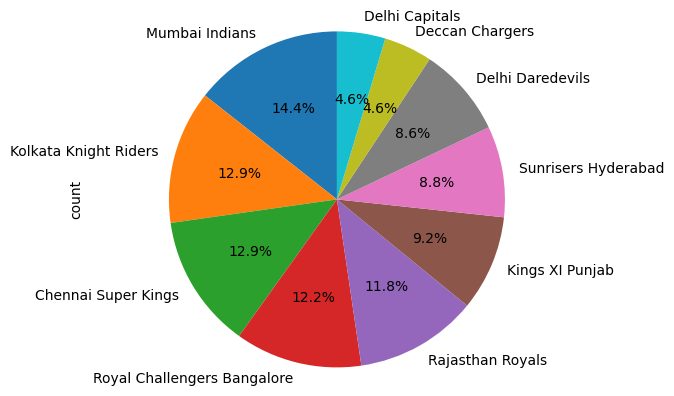

In [30]:
toss_wins=df["Toss_winner"].value_counts().head(10)
print(toss_wins)
toss_wins.plot(kind='pie',autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

14. WHAT IS THE AVERAGE TARGET SCORE?

In [39]:
average_score=df["Target"].mean()
print(average_score)


163.95200783545545


15. FIND THE TOP 5 CITIES WHERE MATCHES ARE HELD?

City
Mumbai       166
Kolkata       86
Delhi         85
Chennai       76
Hyderabad     71
Name: count, dtype: int64


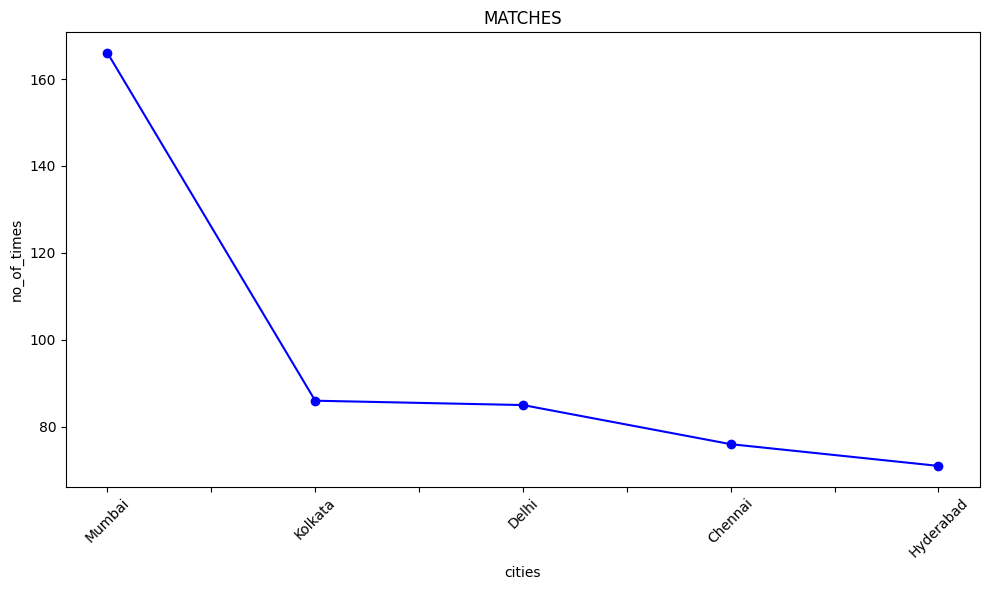

In [46]:
cities=df["City"].value_counts()
top_5_city=cities.head(5)
print(top_5_city)
plt.figure(figsize=(10, 6))  
top_5_city.plot(kind='line', marker='o', linestyle='-', color='b', title='MATCHES')
plt.xlabel('cities')
plt.ylabel('no_of_times')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CONCLUSION

The dataset provides a comprehensive overview of cricket matches, capturing various details like cities, teams, match outcomes, and player performances. Mumbai stands out as the city hosting the maximum matches (166), followed by Kolkata and Delhi. Among teams, Mumbai Indians dominate as the most successful team with 140 wins, excelling particularly in defending totals. Players like AB de Villiers and CH Gayle have consistently delivered match-winning performances, with the highest number of “Player of the Match” awards. The data reveals valuable trends, including city-wise preferences, team strengths in chasing or defending, and the impact of toss outcomes on match results. Overall, the dataset is a rich source for analyzing team strategies and individual performances in cricket 